# Machine Learning with Titanic Dataset - Kaggle

# Sagar Shah
**February 16, 2020**

**Kaggle Competition | Titanic Machine Learning from Disaster**

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this contest, we are asked to complete the analysis of what sorts of people were likely to survive using machine learning tools.

This Kaggle Getting Started Competition provides an ideal starting place for people who may not have a lot of experience in data science and machine learning."

In [391]:
import os
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [392]:
#setting working directory
os.chdir('C:/Users/sagar/Documents/Jobs related/Projects/Titanic Machine Learning')

#read titanic dataset
titanic = pd.read_csv('titanic.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [393]:
#no of passengers in titanic
print('No of Passengers ', str(len(titanic.index)))

No of Passengers  1310


## Analyzing Data

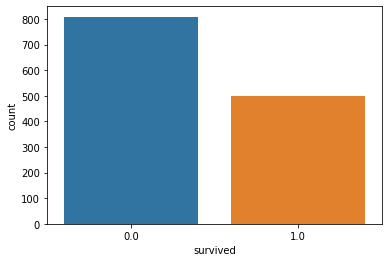

In [394]:
sns.countplot(x='survived', data=titanic)  #1 indicates the passenger has survived

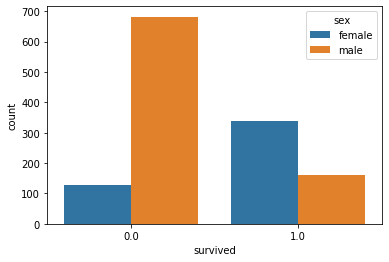

In [395]:
sns.countplot(x='survived', hue='sex', data=titanic)

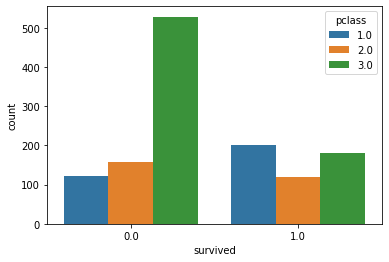

In [396]:
sns.countplot(x='survived', hue='pclass', data=titanic)

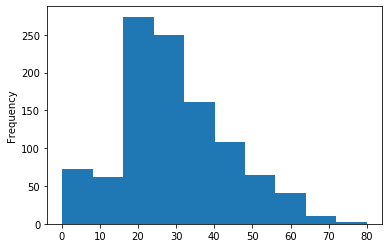

In [397]:
titanic['age'].plot.hist()

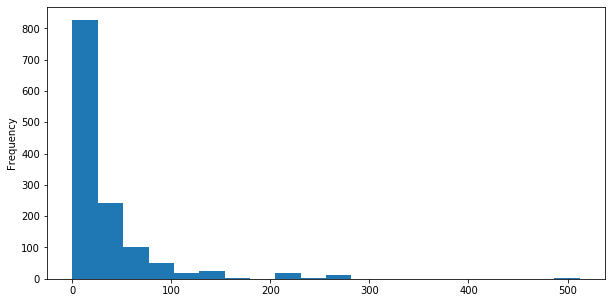

In [398]:
titanic['fare'].plot.hist(bins=20, figsize=(10,5))

titanic.info()

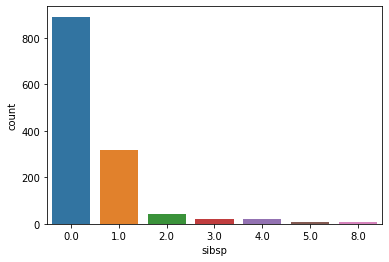

In [399]:
sns.countplot(x='sibsp', data=titanic)

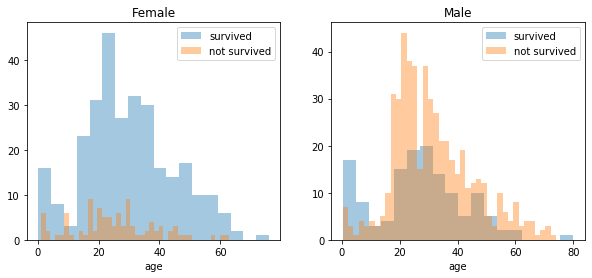

In [400]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = titanic[titanic['sex']=='female']
men = titanic[titanic['sex']=='male']
ax = sns.distplot(women[women['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

C:\Users\sagar\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


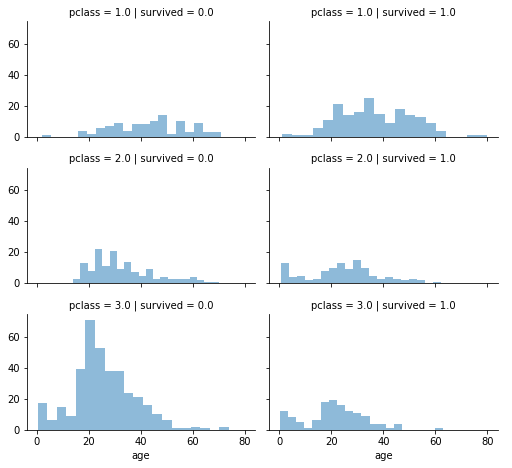

In [401]:
grid = sns.FacetGrid(titanic, col='survived', row='pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

C:\Users\sagar\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


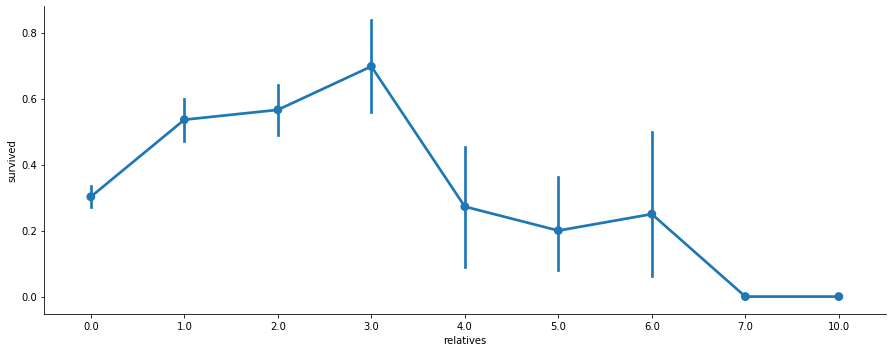

In [402]:
titanic['relatives'] = titanic['sibsp'] + titanic['parch']
titanic['relatives'].value_counts()

axes = sns.factorplot('relatives','survived', data=titanic, aspect = 2.5, )

Here we can see that you had a high probabilty of survival if you were accompanied by 1 to 3 relatives, but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives).

# Data Wrangling

We have to deal with missing values in Cabin (1015), Embarked (3) and Age (264). 

Firstly I decided to delete the ‘Cabin’ variable but then I found something interesting. A cabin number looks like ‘C22’ and the letter refers to the deck. Therefore we are going to extract these and create a new feature, that contains deck letter in which the person was located.

Then, we will convert the feature into a numeric variable and the missing values will be converted to zero. 

In [403]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

titanic['cabin'] = titanic['cabin'].fillna("U0")
titanic['deck'] = titanic['cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
titanic['deck'] = titanic['deck'].map(deck)
titanic['deck'] = titanic['deck'].fillna(0)
titanic['deck'] = titanic['deck'].astype(int)

In [404]:
titanic['deck'].value_counts()

8    1015
3      94
2      65
4      46
5      41
1      22
6      21
7       5
0       1
Name: deck, dtype: int64

Considering Age feature, we will create an array that contain random numbers, which are computed based on the mean age value in regard to the standard deviation and sum of missing values.

In [405]:
mean = titanic["age"].mean()
std = titanic["age"].std()
is_null = titanic["age"].isnull().sum()
    
# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)

# fill NaN values in Age column with random values generated
age_slice = titanic["age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
titanic["age"] = age_slice
titanic["age"] = titanic["age"].astype(int)
titanic["age"].isnull().sum()

0

Since the Embarked feature has only 3 missing values, we will just fill these with the most common one.

In [406]:
titanic['embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: embarked, dtype: object

In [407]:
#filling embarked with the common value 'S'
titanic['embarked'] = titanic['embarked'].fillna('S')

In [408]:
#checking the count of missing values
titanic.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age             0
sibsp           1
parch           1
ticket          1
fare            2
cabin           0
embarked        0
boat          824
body         1189
home.dest     565
relatives       1
deck            0
dtype: int64

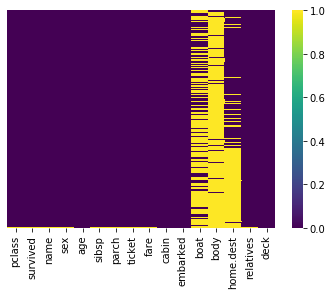

In [409]:
sns.heatmap(titanic.isnull(), yticklabels=False, cmap='viridis')  #yellow indicates null values in particular column

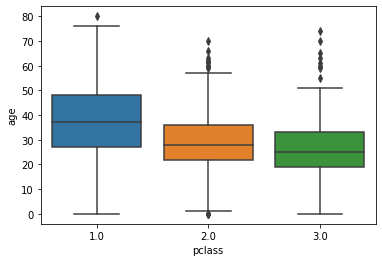

In [412]:
#plotting age with respect to passenger class
sns.boxplot(x='pclass', y='age', data=titanic)

In [411]:
#dropping columns with missing values - cabin, body, boat, home.dest
titanic.drop(['cabin', 'boat', 'body', 'home.dest'], axis=1, inplace=True)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,relatives,deck
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,211.3375,S,0.0,2
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0,1.0,2.0,113781,151.5500,S,3.0,3
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,151.5500,S,3.0,3
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,151.5500,S,3.0,3
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,151.5500,S,3.0,3


In [413]:
titanic.shape

(1310, 12)

In [414]:
titanic.dropna(inplace=True)
titanic.shape

(1308, 12)

We can see a lot of categorical variables and need to transform them as factors

In [416]:
genders = {'male':0, 'female':1}
titanic['sex'] = titanic['sex'].map(genders)

In [417]:
ports = {'S':0, 'C':1, 'Q':2}
titanic['embarked'] = titanic['embarked'].map(ports)

In [418]:
titanic['pclass'] = titanic['pclass'].astype(int)

In [419]:
titanic.drop(['name', 'ticket'], axis=1, inplace=True)

In [420]:
titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,relatives,deck
0,1,1.0,1,29,0.0,0.0,211.3375,0,0.0,2
1,1,1.0,0,0,1.0,2.0,151.5500,0,3.0,3
2,1,0.0,1,2,1.0,2.0,151.5500,0,3.0,3
3,1,0.0,0,30,1.0,2.0,151.5500,0,3.0,3
4,1,0.0,1,25,1.0,2.0,151.5500,0,3.0,3


## Splitting the data into training and test datasets

In [421]:
X = titanic.drop('survived', axis=1)   #select all columns except survived since they are predictor variables
y = titanic['survived']        # y = survived is the response variable 

In [422]:
 from sklearn.model_selection import train_test_split

In [423]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Logistic Regression

In [424]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

#Training Accuracy
acc_log = round(logreg.score(X_train, y_train)*100, 2)
print('Training Accuracy is', acc_log)

#Testing Accuracy
acc_log_test = round(accuracy_score(y_test, y_pred)*100,2)
print('Testing Accuracy is', acc_log_test)

Training Accuracy is 77.7
Testing Accuracy is 81.68


C:\Users\sagar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Stochastic Gradient Descent

In [360]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
print('Training Accuracy is', acc_sgd)

acc_sgd_test = round(accuracy_score(y_test, y_pred)*100, 2)
print('Testing Accuracy is', acc_sgd_test)

Testing Accuracy is 61.31
Testing Accuracy is 62.85


# Random Forest Algorithm

In [373]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print('Training Accuracy is', acc_random_forest)

acc_random_forest_test = round(accuracy_score(y_test, y_pred)*100, 2)
print('Testing Accuracy is', acc_random_forest_test)

Training Accuracy is 98.47
Testing Accuracy is 77.1


# K Nearest Neighbour

In [364]:
# KNN 
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)  

y_pred = knn.predict(X_test)  

acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print('Training Accuracy is', acc_knn)

acc_knn_test = round(accuracy_score(y_test, y_pred)*100,2)
print('Testing Accuracy is', acc_knn_test)

Training Accuracy is 81.86
Testing Accuracy is 64.89


# Gaussian Naive Bayes

In [365]:
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  

y_pred = gaussian.predict(X_test) 

acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print('Training Accuracy is', acc_gaussian)

acc_gaussian_test = round(accuracy_score(y_test, y_pred)*100, 2)
print('Testing Accuracy is', acc_gaussian_test)

Training Accuracy is 76.94
Testing Accuracy is 75.32


# Linear Support Vector Machine

In [366]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
print('Training Accuracy is', acc_linear_svc)

acc_linear_svc_test = round(accuracy_score(y_test, y_pred)*100,2)
print('Testing Accuracy is', acc_linear_svc_test)

Training Accuracy is 74.75
Testing Accuracy is 75.57


C:\Users\sagar\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Decision Tree

In [367]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)  

y_pred = decision_tree.predict(X_test) 

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print('Training Accuracy is', acc_decision_tree)

acc_decision_tree_test = round(accuracy_score(y_test, y_pred)*100,2)
print('Testing Accuracy is', acc_decision_tree_test)

Training Accuracy is 98.47
Testing Accuracy is 74.55


In [368]:
#Comparing all models
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Training Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_decision_tree],
    'Testing Score': [acc_linear_svc_test, acc_knn_test, acc_log_test, 
              acc_random_forest_test, acc_gaussian_test, 
              acc_sgd_test, acc_decision_tree_test]})
result_df = results.sort_values(by='Testing Score', ascending=False)
result_df = result_df.set_index('Testing Score')
result_df

,Model,Training Score
Testing Score,,
81.93,Logistic Regression,77.70
76.59,Random Forest,98.47
75.57,Support Vector Machines,74.75
75.32,Naive Bayes,76.94
74.55,Decision Tree,98.47
64.89,KNN,81.86
62.85,Stochastic Gradient Decent,61.31


# K-Fold Cross Validation

In [369]:
#since the random forest performs the best on training set and testing set, we evaluate the model using 4-fold cross validation
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=4, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.82608696 0.76419214 0.80263158 0.76315789]
Mean: 0.7890171424859852
Standard Deviation: 0.02666695262115587


I think the accuracy is still really good and since random forest is an easy to use model, we will try to increase it’s performance even further in the following section.

# Feature Importance
Another great quality of random forest is that they make it very easy to measure the relative importance of each feature. Sklearn measure a features importance by looking at how much the treee nodes, that use that feature, reduce impurity on average (across all trees in the forest). It computes this score automaticall for each feature after training and scales the results so that the sum of all importances is equal to 1. 

In [370]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
age,0.262
fare,0.245
sex,0.226
deck,0.064
pclass,0.063
relatives,0.052
embarked,0.034
parch,0.027
sibsp,0.026


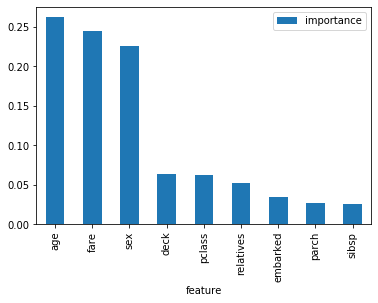

In [371]:
importances.plot.bar()

# Out of Bag Score

In [377]:
#check the out of bag score for random forest model
print("oob score:", round(random_forest.oob_score_, 4)*100,'%')

oob score: 79.23 %


# Hyperparameter Tuning

In [380]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, y_train)
clf.best_params_

C:\Users\sagar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

# Testing New Parameters 

In [382]:
# Random Forest Model with optimized parameters
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 80.55 %


# Model Evaluation

In [383]:
#confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(random_forest, X_train, y_train, cv=3)
confusion_matrix(y_train, y_pred)

array([[494,  67],
       [103, 251]], dtype=int64)

# Precision & Recall

In [384]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, y_pred))
print("Recall:",recall_score(y_train, y_pred))

Precision: 0.789308176100629
Recall: 0.7090395480225988


# F-Score

In [385]:
from sklearn.metrics import f1_score
f1_score(y_train, y_pred)

0.7470238095238095

# Precision  Recall Curve

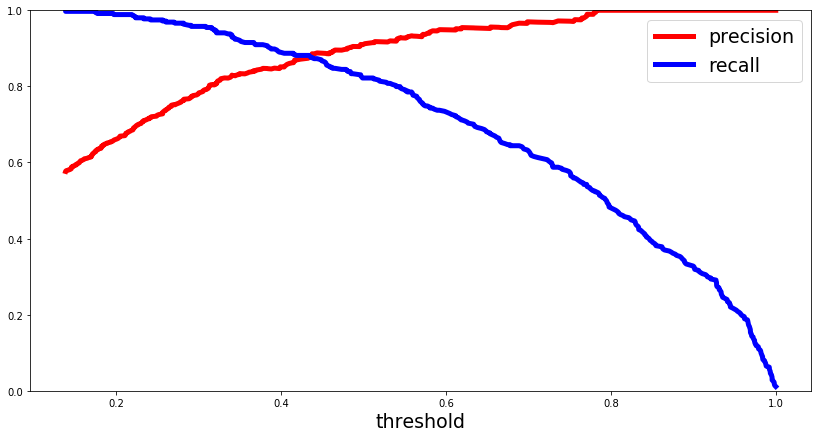

In [387]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

# ROC AUC Curve

This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall.

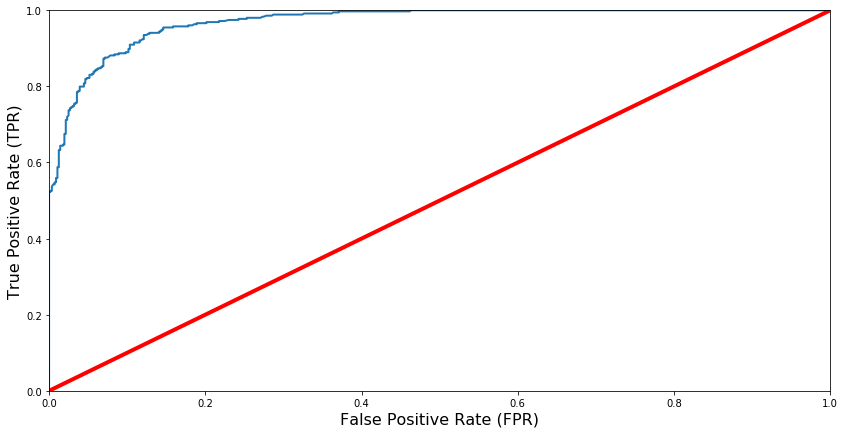

In [388]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

# ROC AUC Score

The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under the curve, which is called AUC.

A classifiers that is 100% correct, would have a ROC AUC Score of 1 and a completely random classiffier would have a score of 0.5.

In [390]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9693444917771937


Thank You!!!